## Hallmarks of Online Privacy Minders - MODEL

**Goal:** This analysis aims to establish some hallmark behaviours of Online Privacy Minders. This set of behaviours then can be used to target consumers with online privacy products such as VPN's, custom ROM's and privacy oriented smart phones.

**Process:** The data used herein was obtained from https://www.pewresearch.org/internet/dataset/american-trends-panel-wave-49/ and is manipulated to include 80+ responses to online privacy related questions by over 4,200 individuals. All responses are categorical and they were converted to binary variables using "get-dummies" method.The target group was set from individuals who answered the "How closely, if at all, do you follow news about privacy issues?" question as "very closely". This group made 11% of the survey population about 470 individuals.(imbalanced dataset!) To try and identify any behavioral patterns of the target group,three machine learning algorithms were employed, using the same training and testing data. Once models were fitted and scored, F1, Recall and Precision scores were used to compare model performance. 

**Conclusions:** As a baseline model, BernoulliNB was fitted and scored as all the data is categorical. However, F1 score is particularly low at 0.345, along with Recall score at 0.448 and Precision score at 0.280. Logistic Regression was modeled, fitted and scored next, with F1 score at 0.324, Recall score at 0.581 and Precision score at 0.224. Finally, Random Forest Classifier was modeled, fitted and scored with the following scores: Precision: 0.3360, Recall: 0.3088, F1: 0.3218. 

Since the three models produced very similar F1 scores, Logistic Regression was the model of choice due to producing the highest Recall score at 0.581. Looking at feature importance data from the Log Reg model utilizing the horizontal bar chart showing the features vs coefficient scores it is apparent that the features with higher positive scores tend to be "No Answer / Refused to Answer" to the corresponding questions in the survey. Some of those questions of which their responses of "No Answer / Refused to Answer" generated scores greater than  2 are:

   *- How much do you feel you personally benefit from the data that companies collect about you?*
   
   *- As far as you know, how much of what you do online or on your cellphone is being tracked by advertisers, technology firms or other companies?*
    
   *- As far as you know how much of what you do OFFLINE - like where you are or who you are talking to - is being tracked by advertisers, technology firms or other companies?*
    
   *- Do you regularly wear a smartwatch or a wearable fitness tracker?*
    
   *- Do you use Instagram?*

Seeing the trends as outlined above, it is safe to say individuals who mind their online privacy are also mindful about answering some of the privacy related questions. 

One other question of which its response of "No" generated greater than a 2 score in the feature importance chart is this:

   *- Do you ever see advertisements or solicitations that appear to be based on a profile that has been made of you using your personal data?* <br>

The "No" response to this question made 9% of the respondents about 302 individuals which also goes hand in hand with  the above conclusion that online privacy minders take precautions about revealing their personal data to third parties.

**From here:** The Log Reg and Random Forest models can perhaps be further improved by over-sampling the training data using SMOTE or ADASYN to achieve a higher F1, Recall and precision scores. Initial attempt at oversampling produced errors so this phase of the modeling will be re-visited as time permmits.

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import imblearn.over_sampling

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, \
                            accuracy_score, roc_auc_score, roc_curve, auc,\
                            classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree


In [2]:
W49 = pd.read_csv('ATP W49.csv')

In [3]:
W49.head()

,QKEY,DEVICE_TYPE_W49,LANG_W49,FORM_W49,SOCMEDIAUSEa_W49,SOCMEDIAUSEb_W49,SOCMEDIAUSEc_W49,SOCMEDIAUSEd_W49,SNSUSER_W49,ELECTFTGSNSINT_W49,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,WEIGHT_W49
0,100260,2,9,2,2,2,2,2,0,,...,1,,1,6,2,1,1,1,2,0.308756
1,100588,1,9,1,1,1,1,2,1,2,...,2,,2,6,2,1,3,1,2,0.417927
2,100637,3,9,1,1,2,2,2,1,2,...,3,1,1,5,2,1,1,1,2,0.590463
3,101224,1,9,2,1,2,2,2,1,2,...,1,,1,5,2,1,2,1,1,0.393867
4,101322,1,9,1,1,2,2,2,1,2,...,1,,1,8,1,3,2,1,2,1.236273


In [4]:
W49.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Columns: 143 entries, QKEY to WEIGHT_W49
dtypes: float64(1), int64(67), object(75)
memory usage: 4.7+ MB


### INITIAL EDA

In [5]:
list(W49.columns.values)

['QKEY',
 'DEVICE_TYPE_W49',
 'LANG_W49',
 'FORM_W49',
 'SOCMEDIAUSEa_W49',
 'SOCMEDIAUSEb_W49',
 'SOCMEDIAUSEc_W49',
 'SOCMEDIAUSEd_W49',
 'SNSUSER_W49',
 'ELECTFTGSNSINT_W49',
 'TALKDISASNSINT_W49',
 'TALKCMNSNSINT_W49',
 'SECUR1_W49',
 'PRIVACYNEWS1_W49',
 'HOMEASSIST1_W49',
 'HOMEASSIST2_W49',
 'HOMEASSIST3_W49',
 'HOMEASSIST4_W49',
 'HOMEASSIST5a_W49',
 'HOMEASSIST5b_W49',
 'HOMEIOT_W49',
 'FITTRACK_W49',
 'LOYALTY_W49',
 'DNATEST_W49',
 'TRACKCNT_W49',
 'TRACKCO1a_W49',
 'TRACKCO1b_W49',
 'CONCERNCO_W49',
 'BENEFITCO_W49',
 'CONTROLCO_W49',
 'UNDERSTANDCO_W49',
 'POSNEGCO_W49',
 'ANONYMOUS1CO_W49',
 'TRACKGOV1a_W49',
 'TRACKGOV1b_W49',
 'CONCERNGOV_W49',
 'BENEFITGOV_W49',
 'CONTROLGOV_W49',
 'UNDERSTANDGOV_W49',
 'POSNEGGOV_W49',
 'ANONYMOUS1GOV_W49',
 'CONCERNGRPa_W49',
 'CONCERNGRPb_W49',
 'CONCERNGRPc_W49',
 'CONCERNGRPd_W49',
 'CONCERNGRPe_W49',
 'CONCERNGRPf_W49',
 'CONTROLGRPa_W49',
 'CONTROLGRPb_W49',
 'CONTROLGRPc_W49',
 'CONTROLGRPd_W49',
 'CONTROLGRPe_W49',
 'CONTROLGR

**Delete columns containing survey methodology info & ID # (i.e. via mobile device, paper form etc)**

In [6]:
W49 = W49.drop(['QKEY','DEVICE_TYPE_W49','LANG_W49','FORM_W49'], axis = 1)

**Drop columns containing responses to election / politics related questions**

In [7]:
W49 = W49.drop(['ELECTFTGSNSINT_W49','TALKDISASNSINT_W49','TALKCMNSNSINT_W49'], axis = 1)

**Delete responses to non-privacy related questions**

In [8]:
W49 = W49.drop(['HOMEASSIST3_W49'], axis = 1)

**Delete responses to sentimental questions regarding privacy policy statements, regulations and law**

In [9]:
W49 = W49.drop(['PP1_W49','PP2_W49','PP3_W49','PP4_W49','PP5a_W49','PP5b_W49','PP5c_W49',\
                 'PP5d_W49','PP5e_W49','PP6a_W49','PP6b_W49','PP6c_W49'], axis = 1)

In [10]:
W49 = W49.drop([ 'PRIVACYREG_W49','GOVREGV1_W49','GOVREGV2_W49','PUBLICDATA_W49'], axis = 1)

In [11]:
W49 = W49.drop(['RTBFa_W49','RTBFb_W49','RTBFc_W49','RTBFd_W49','RTDa_W49','RTDb_W49',\
                'RTDc_W49','RTDd_W49'], axis = 1)

In [12]:
W49 = W49.drop(['PROFILE2_W49','DATAUSEa_W49','DATAUSEb_W49','DATAUSEc_W49','DATAUSEd_W49',\
                 'DATAUSEe_W49','DATAUSEf_W49',], axis = 1)

In [13]:
W49 = W49.drop([ 'FACE1_W49','FACE2a_W49','FACE2b_W49','FACE2c_W49','FACE3a_W49',\
                 'FACE3b_W49','FACE3c_W49','FACE4a_W49','FACE4b_W49','FACE4c_W49',\
                'FACE4d_W49'], axis = 1)

**Delete derived columns of data**

In [14]:
W49 = W49.drop(['F_INCOME_RECODE','F_PARTYLN_FINAL','F_PARTY_FINAL','F_RACECMB','F_EDUCCAT'], axis = 1)

**Delete weights**

In [15]:
W49 = W49.drop(['WEIGHT_W49'], axis = 1)

In [16]:
W49.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 87 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SOCMEDIAUSEa_W49   4272 non-null   int64 
 1   SOCMEDIAUSEb_W49   4272 non-null   int64 
 2   SOCMEDIAUSEc_W49   4272 non-null   int64 
 3   SOCMEDIAUSEd_W49   4272 non-null   int64 
 4   SNSUSER_W49        4272 non-null   int64 
 5   SECUR1_W49         4272 non-null   int64 
 6   PRIVACYNEWS1_W49   4272 non-null   int64 
 7   HOMEASSIST1_W49    4272 non-null   int64 
 8   HOMEASSIST2_W49    4272 non-null   object
 9   HOMEASSIST4_W49    4272 non-null   object
 10  HOMEASSIST5a_W49   4272 non-null   object
 11  HOMEASSIST5b_W49   4272 non-null   object
 12  HOMEIOT_W49        4272 non-null   int64 
 13  FITTRACK_W49       4272 non-null   int64 
 14  LOYALTY_W49        4272 non-null   int64 
 15  DNATEST_W49        4272 non-null   int64 
 16  TRACKCNT_W49       4272 non-null   int64 


In [17]:
y = []
for elem in W49['PRIVACYNEWS1_W49']:
    if elem == 1:
        y.append(1)
    else:
        y.append(0)


In [18]:
W49= W49.astype(str)

In [19]:
W49.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 87 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SOCMEDIAUSEa_W49   4272 non-null   object
 1   SOCMEDIAUSEb_W49   4272 non-null   object
 2   SOCMEDIAUSEc_W49   4272 non-null   object
 3   SOCMEDIAUSEd_W49   4272 non-null   object
 4   SNSUSER_W49        4272 non-null   object
 5   SECUR1_W49         4272 non-null   object
 6   PRIVACYNEWS1_W49   4272 non-null   object
 7   HOMEASSIST1_W49    4272 non-null   object
 8   HOMEASSIST2_W49    4272 non-null   object
 9   HOMEASSIST4_W49    4272 non-null   object
 10  HOMEASSIST5a_W49   4272 non-null   object
 11  HOMEASSIST5b_W49   4272 non-null   object
 12  HOMEIOT_W49        4272 non-null   object
 13  FITTRACK_W49       4272 non-null   object
 14  LOYALTY_W49        4272 non-null   object
 15  DNATEST_W49        4272 non-null   object
 16  TRACKCNT_W49       4272 non-null   object


In [20]:
W49_dum_drop = pd.get_dummies(W49, prefix=list(W49.columns.values),drop_first=True)

In [21]:
W49_dum_drop.head()

,SOCMEDIAUSEa_W49_2,SOCMEDIAUSEa_W49_99,SOCMEDIAUSEb_W49_2,SOCMEDIAUSEb_W49_99,SOCMEDIAUSEc_W49_2,SOCMEDIAUSEc_W49_99,SOCMEDIAUSEd_W49_2,SOCMEDIAUSEd_W49_99,SNSUSER_W49_1,SECUR1_W49_2,...,F_REG_99,F_IDEO_2,F_IDEO_3,F_IDEO_4,F_IDEO_5,F_IDEO_99,F_ACSWEB_0,F_ACSWEB_1,F_VOLSUM_2,F_VOLSUM_99
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,1,1,0
2,0,0,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,0,1,0,1,0,1,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,1,0,1,0,1,1,...,0,1,0,0,0,0,0,1,1,0


In [22]:
W49_dum_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Columns: 359 entries, SOCMEDIAUSEa_W49_2 to F_VOLSUM_99
dtypes: uint8(359)
memory usage: 1.5 MB


In [23]:
list(W49_dum_drop.columns.values)

['SOCMEDIAUSEa_W49_2',
 'SOCMEDIAUSEa_W49_99',
 'SOCMEDIAUSEb_W49_2',
 'SOCMEDIAUSEb_W49_99',
 'SOCMEDIAUSEc_W49_2',
 'SOCMEDIAUSEc_W49_99',
 'SOCMEDIAUSEd_W49_2',
 'SOCMEDIAUSEd_W49_99',
 'SNSUSER_W49_1',
 'SECUR1_W49_2',
 'SECUR1_W49_3',
 'SECUR1_W49_99',
 'PRIVACYNEWS1_W49_2',
 'PRIVACYNEWS1_W49_3',
 'PRIVACYNEWS1_W49_4',
 'PRIVACYNEWS1_W49_99',
 'HOMEASSIST1_W49_2',
 'HOMEASSIST1_W49_99',
 'HOMEASSIST2_W49_1',
 'HOMEASSIST2_W49_2',
 'HOMEASSIST2_W49_3',
 'HOMEASSIST2_W49_4',
 'HOMEASSIST4_W49_1',
 'HOMEASSIST4_W49_2',
 'HOMEASSIST4_W49_3',
 'HOMEASSIST4_W49_4',
 'HOMEASSIST4_W49_99',
 'HOMEASSIST5a_W49_1',
 'HOMEASSIST5a_W49_2',
 'HOMEASSIST5a_W49_99',
 'HOMEASSIST5b_W49_1',
 'HOMEASSIST5b_W49_2',
 'HOMEASSIST5b_W49_99',
 'HOMEIOT_W49_2',
 'HOMEIOT_W49_99',
 'FITTRACK_W49_2',
 'FITTRACK_W49_99',
 'LOYALTY_W49_2',
 'LOYALTY_W49_99',
 'DNATEST_W49_2',
 'DNATEST_W49_99',
 'TRACKCNT_W49_1',
 'TRACKCNT_W49_2',
 'TRACKCNT_W49_3',
 'TRACKCNT_W49_4',
 'TRACKCNT_W49_5',
 'TRACKCO1a_W49_1',


**Define train and target sets**

In [24]:
#Drop groups of respondents who DO NOT follow news about privacy issues very closely.

W49_dum_drop = W49_dum_drop.drop([ 'PRIVACYNEWS1_W49_2','PRIVACYNEWS1_W49_3',\
                                  'PRIVACYNEWS1_W49_4','PRIVACYNEWS1_W49_99'], axis = 1)

In [25]:
X = W49_dum_drop

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
nb = BernoulliNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.8190327613104524

In [28]:
print(f"Precision:{precision_score(y_test, nb.predict(X_test))}")
print(f"Recall:{recall_score(y_test, nb.predict(X_test))}")
print(f"F1:{f1_score(y_test, nb.predict(X_test))}")#Low F1 score


Precision:0.2798165137614679
Recall:0.4485294117647059
F1:0.34463276836158196


In [29]:
print("NB confusion matrix: \n\n", confusion_matrix(y_test, nb.predict(X_test)))

NB confusion matrix: 

 [[989 157]
 [ 75  61]]


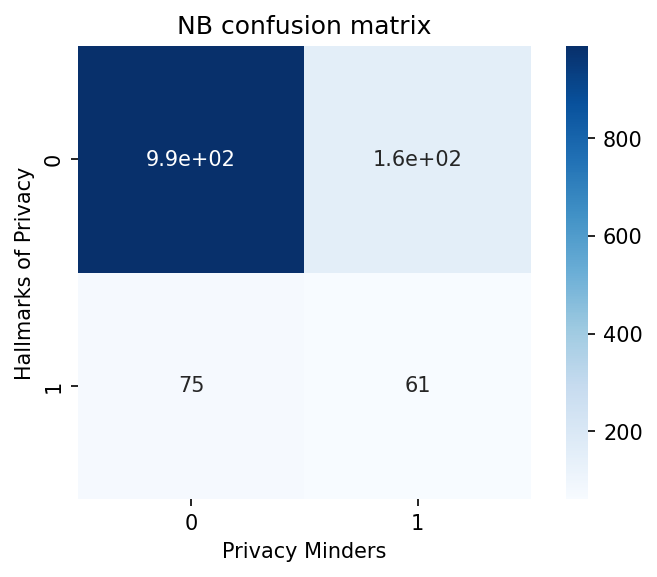

In [30]:
nb_confusion = confusion_matrix(y_test, nb.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(nb_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Privacy Minders')
plt.ylabel('Hallmarks of Privacy')
plt.title('NB confusion matrix');

**Let's model and fit a Logistic Regression using the same training data set we used for the Naive Bayes model above**

In [31]:
# As we are not needing our data to be scaled, we will utilize a high C value to minimize
# Regularization in our model


lm1 = LogisticRegression(C=1000, max_iter=10000)
lm1.fit(X_train, y_train)

y_predict = lm1.predict(X_train) 
lm1.score(X_train, y_train)



0.9130434782608695

In [32]:
print("LogReg confusion matrix: \n\n", confusion_matrix(y_train, y_predict))

LogReg confusion matrix: 

 [[2628   37]
 [ 223  102]]


In [33]:
print(f"Precision:{precision_score(y_train, y_predict)}")
print(f"Recall:{recall_score(y_train, y_predict)}")
print(f"F1:{f1_score(y_train, y_predict)}")



Precision:0.7338129496402878
Recall:0.31384615384615383
F1:0.4396551724137931


**Since we have an imbalanced class label, it is likely that the default 0.5 threshold is not
producing the max F1 score available. Let's see if we can improve our F1 score**

In [34]:
y_predict_proba = lm1.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, y_predict_proba)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), \
                    '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr),\
                    index = i), 'thresholds' : pd.Series(thresholds, index = i)})

roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Above code is taken from:
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python

# Optimum threshold for our Log Reg model computes out to be 0.118523


Area under the ROC curve : 0.873447


,fpr,tpr,1-fpr,tf,thresholds
284,0.208255,0.793846,0.791745,0.002101,0.118523


In [35]:
# using the new threshold of 0.118523
y_predict = (lm1.predict_proba(X_train)[:,1] > 0.118523)
print("Threshold of 0.118523:")
print("Precision: {:6.4f}, Recall: {:6.4f}, F1: {:6.4f}".format(precision_score\
                                                        (y_train, y_predict), 
                                                        recall_score(y_train, y_predict),\
                                                        f1_score(y_train, y_predict)))

Threshold of 0.118523:
Precision: 0.3173, Recall: 0.7938, F1: 0.4534


In [36]:
print("LogReg confusion matrix w/0.12 threshold: \n\n", confusion_matrix(y_train, y_predict))

LogReg confusion matrix w/0.12 threshold: 

 [[2110  555]
 [  67  258]]


**Now let's score our model on the test dataset**

In [37]:
y_predict = (lm1.predict_proba(X_test)[:,1] > 0.118523)
lm1.score(X_test, y_test)

0.8689547581903276

In [38]:
print("Threshold of 0.118523:")
print("Precision: {:6.4f}, Recall: {:6.4f}, F1: {:6.4f}".format(precision_score\
                                                        (y_test, y_predict), 
                                                        recall_score(y_test, y_predict),\
                                                        f1_score(y_test, y_predict)))

Threshold of 0.118523:
Precision: 0.2244, Recall: 0.5809, F1: 0.3238


In [39]:
print("LogReg confusion matrix w/0.12 threshold: \n\n", confusion_matrix(y_test, y_predict))

LogReg confusion matrix w/0.12 threshold: 

 [[873 273]
 [ 57  79]]


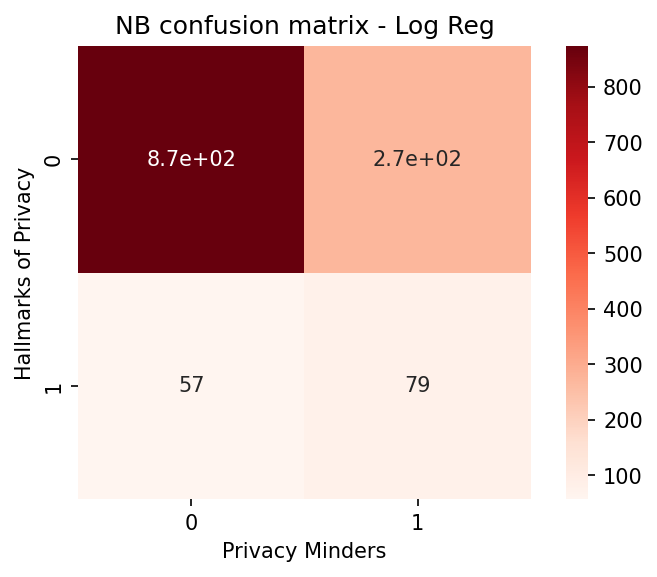

In [40]:
lr_confusion = confusion_matrix(y_test, y_predict)
plt.figure(dpi=150)
sns.heatmap(lr_confusion, cmap=plt.cm.Reds, annot=True, square=True)

plt.xlabel('Privacy Minders')
plt.ylabel('Hallmarks of Privacy')
plt.title('NB confusion matrix - Log Reg');

**Log Reg model scored a lower F1 score vs the Naive Bayes model (0.32 vs 0.34) However, the recall score has significantly improved in Log Reg model to 0.58 whereas recall in Naive Bayes model was 0.45.**

**Note:** Turns out the setting the "class_weight" parameter during model tuning to "balanced" produces similar scores as the above approach where we computed the cut-off threshold and scored the model accordingly.

In [41]:
importance = lm1.coef_.flatten() #taking in coefficients

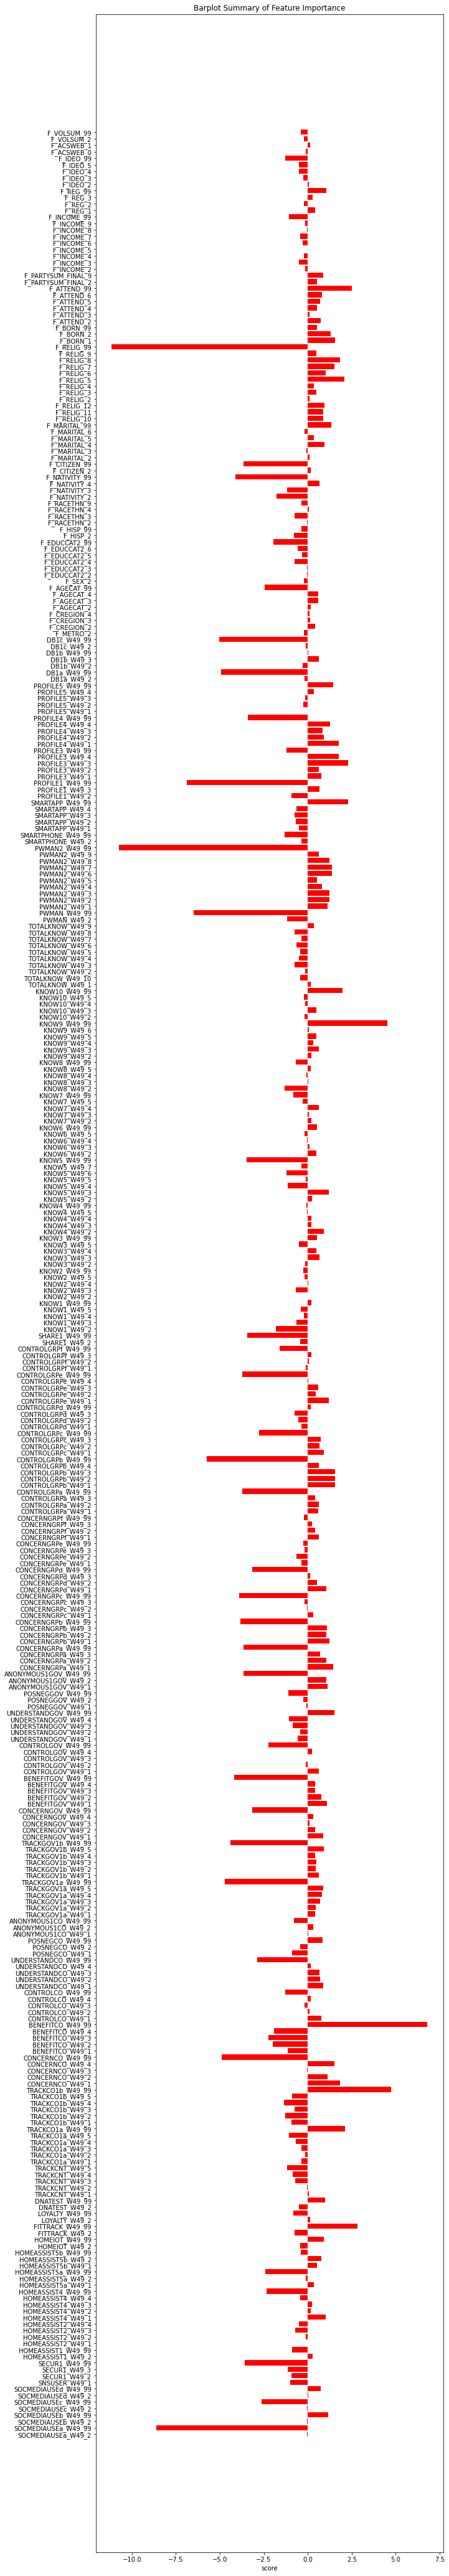

In [42]:
# barplot of features, above and below code taken from: 
# https://medium.com/@curryrowan/simplified-logistic-regression-classification-with-\
# categorical-variables-in-python-1ce50c4b137

plt.rcParams["figure.figsize"] = (10,75)
plt.barh(X.columns, importance, color = "red")
plt.title("Barplot Summary of Feature Importance")
plt.xlabel("score")
plt.show()

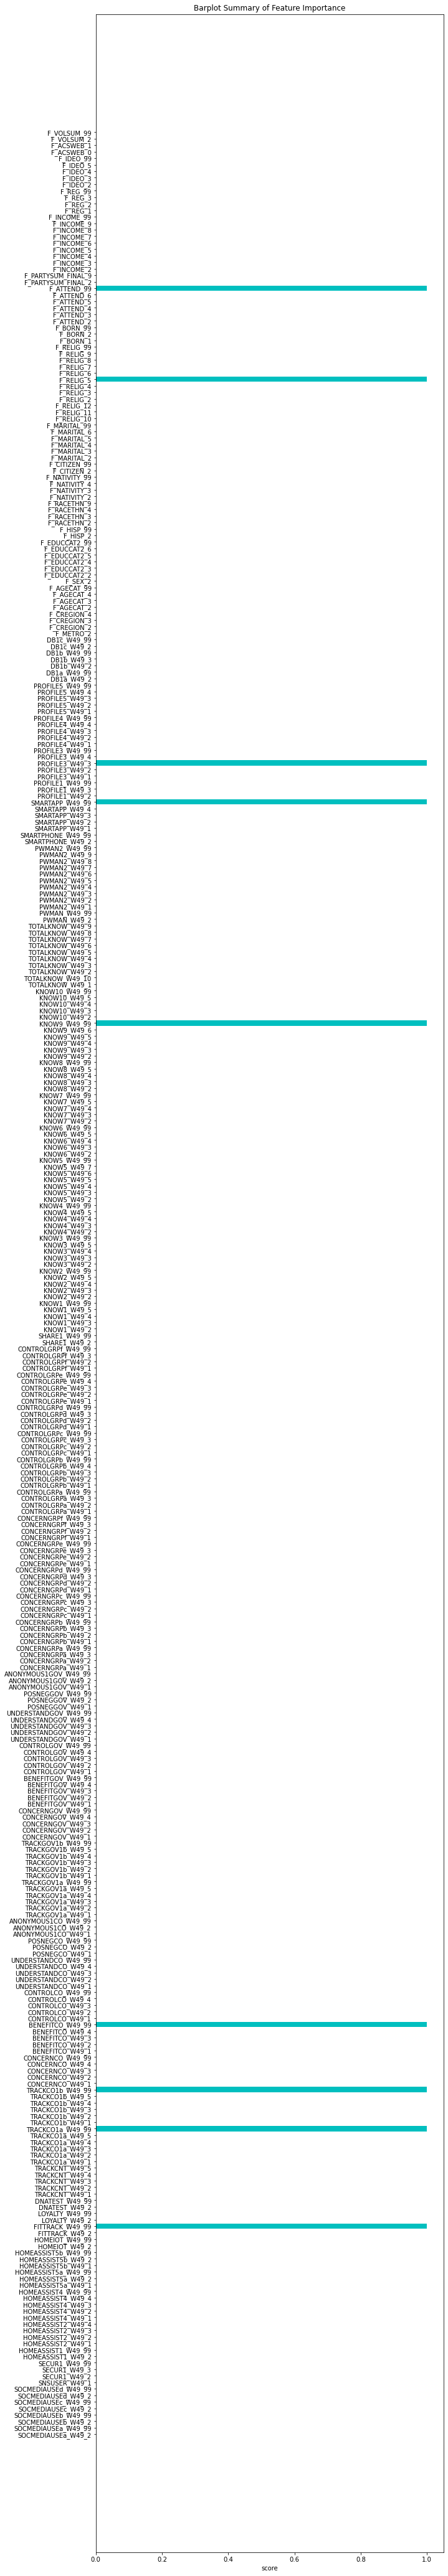

In [43]:
# barplot of features with scores greater than 2
plt.rcParams["figure.figsize"] = (10,75)
plt.barh(X.columns, importance > 2, color = "c")
plt.title("Barplot Summary of Feature Importance")
plt.xlabel("score")
plt.show()

**Notes here for main takeaways from the Feature Importance Chart**

In [44]:
rf = RandomForestClassifier(n_estimators = 1000, max_features='sqrt', max_depth = 10, \
                            class_weight = {0:1 , 1:14})

In [45]:
W49_dum = pd.get_dummies(W49, prefix=list(W49.columns.values),drop_first=False)

In [46]:
W49_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Columns: 446 entries, SOCMEDIAUSEa_W49_1 to F_VOLSUM_99
dtypes: uint8(446)
memory usage: 1.8 MB


In [47]:
list(W49_dum.columns.values)

['SOCMEDIAUSEa_W49_1',
 'SOCMEDIAUSEa_W49_2',
 'SOCMEDIAUSEa_W49_99',
 'SOCMEDIAUSEb_W49_1',
 'SOCMEDIAUSEb_W49_2',
 'SOCMEDIAUSEb_W49_99',
 'SOCMEDIAUSEc_W49_1',
 'SOCMEDIAUSEc_W49_2',
 'SOCMEDIAUSEc_W49_99',
 'SOCMEDIAUSEd_W49_1',
 'SOCMEDIAUSEd_W49_2',
 'SOCMEDIAUSEd_W49_99',
 'SNSUSER_W49_0',
 'SNSUSER_W49_1',
 'SECUR1_W49_1',
 'SECUR1_W49_2',
 'SECUR1_W49_3',
 'SECUR1_W49_99',
 'PRIVACYNEWS1_W49_1',
 'PRIVACYNEWS1_W49_2',
 'PRIVACYNEWS1_W49_3',
 'PRIVACYNEWS1_W49_4',
 'PRIVACYNEWS1_W49_99',
 'HOMEASSIST1_W49_1',
 'HOMEASSIST1_W49_2',
 'HOMEASSIST1_W49_99',
 'HOMEASSIST2_W49_ ',
 'HOMEASSIST2_W49_1',
 'HOMEASSIST2_W49_2',
 'HOMEASSIST2_W49_3',
 'HOMEASSIST2_W49_4',
 'HOMEASSIST4_W49_ ',
 'HOMEASSIST4_W49_1',
 'HOMEASSIST4_W49_2',
 'HOMEASSIST4_W49_3',
 'HOMEASSIST4_W49_4',
 'HOMEASSIST4_W49_99',
 'HOMEASSIST5a_W49_ ',
 'HOMEASSIST5a_W49_1',
 'HOMEASSIST5a_W49_2',
 'HOMEASSIST5a_W49_99',
 'HOMEASSIST5b_W49_ ',
 'HOMEASSIST5b_W49_1',
 'HOMEASSIST5b_W49_2',
 'HOMEASSIST5b_W49_99',
 'H

In [48]:
# Drop target columns
W49_dum = W49_dum.drop(['PRIVACYNEWS1_W49_1', 'PRIVACYNEWS1_W49_2','PRIVACYNEWS1_W49_3',\
                        'PRIVACYNEWS1_W49_4','PRIVACYNEWS1_W49_99'], axis = 1)

In [49]:
X = W49_dum

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

In [52]:
print("Accuracy:",accuracy_score(y_test, rf_predictions))

Accuracy: 0.8533541341653667


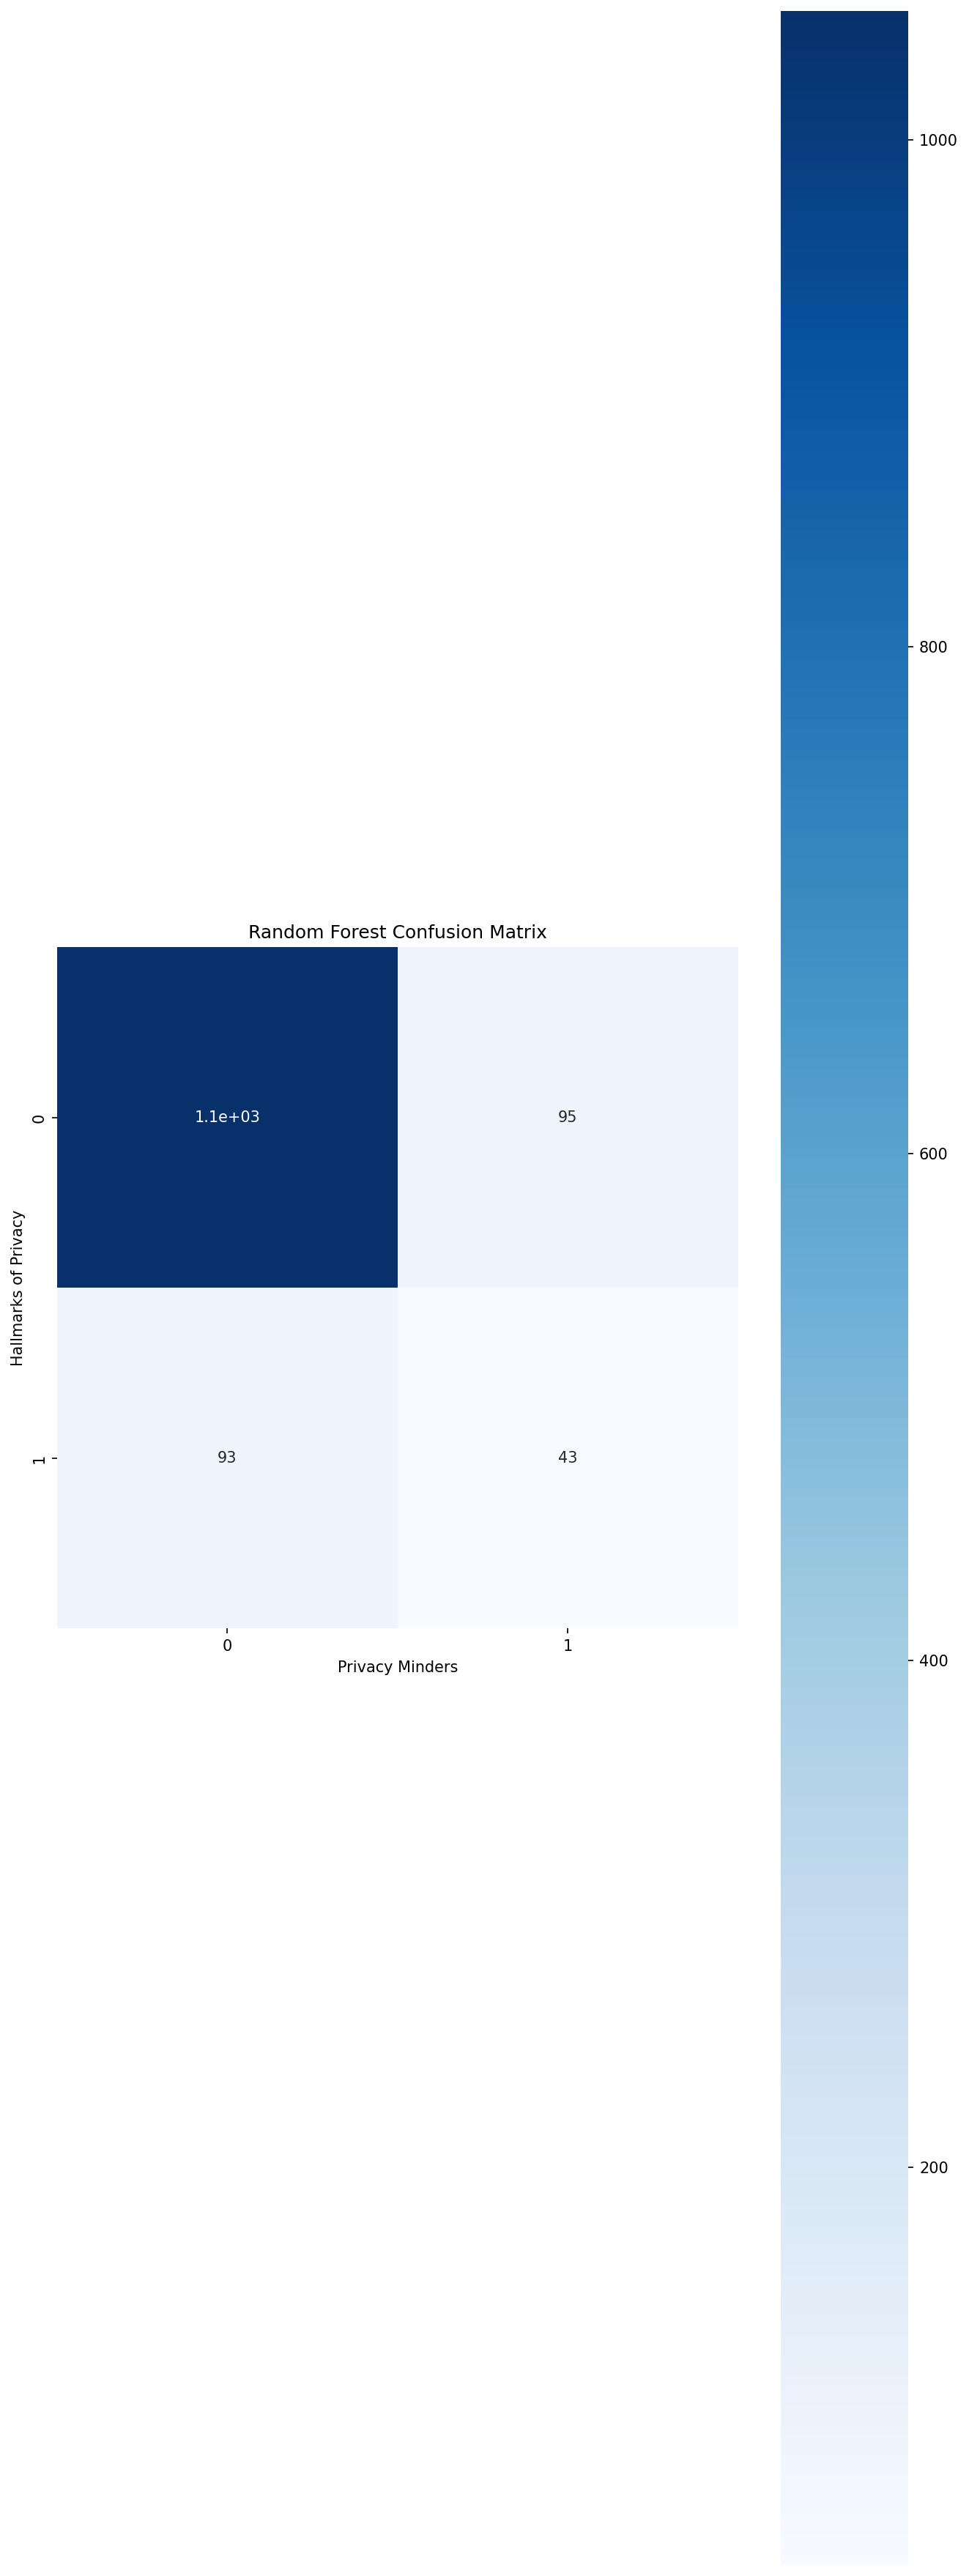

In [53]:
rf_confusion = confusion_matrix(y_test, rf_predictions)
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True)

plt.xlabel('Privacy Minders')
plt.ylabel('Hallmarks of Privacy')
plt.title('Random Forest Confusion Matrix');

In [54]:
confusion_matrix(y_test, rf_predictions)

array([[1051,   95],
       [  93,   43]])

In [55]:
print("Precision: {:6.4f}, Recall: {:6.4f}, F1: {:6.4f}".format(precision_score\
                                                        (y_test, rf_predictions), 
                                                        recall_score(y_test, rf_predictions),\
                                                        f1_score(y_test, rf_predictions)))

Precision: 0.3116, Recall: 0.3162, F1: 0.3139


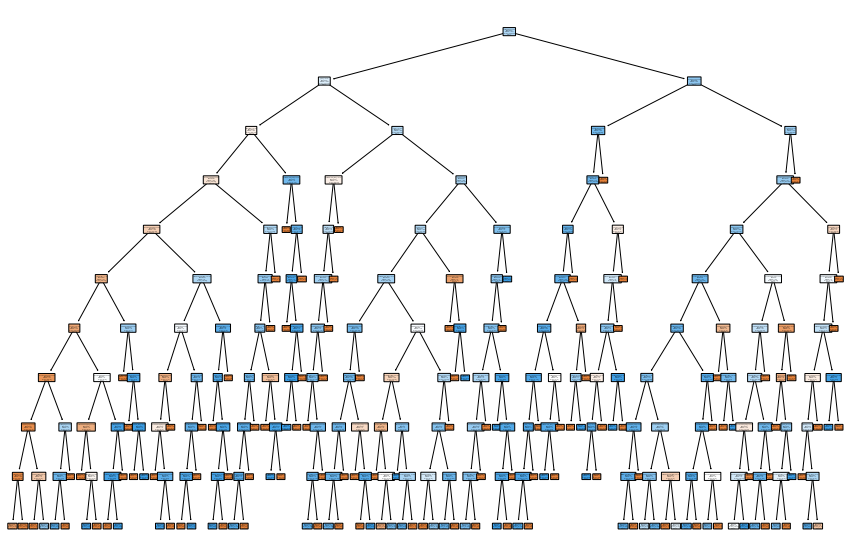

In [56]:
# code taken from: 
# https://datagy.io/sklearn-random-forests/

fig = plt.figure(figsize=(15,10))

plot_tree(rf.estimators_[0], 
          feature_names=X.columns,
          class_names=("0,1"),
          filled=True, rounded=True)

plt.show()